In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banking.csv')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
# les variables qui nous interesse
df=df[['y','age','marital', 'job','education','default', 'loan','housing','pdays','previous']]

In [5]:
df

,y,age,marital,job,education,default,loan,housing,pdays,previous
0,0,44,married,blue-collar,basic.4y,unknown,no,yes,999,0
1,0,53,married,technician,unknown,no,no,no,999,0
2,1,28,single,management,university.degree,no,no,yes,6,2
3,0,39,married,services,high.school,no,no,no,999,0
4,1,55,married,retired,basic.4y,no,no,yes,3,1
...,...,...,...,...,...,...,...,...,...,...
41183,0,59,married,retired,high.school,unknown,yes,no,999,0
41184,0,31,married,housemaid,basic.4y,unknown,no,no,999,0
41185,0,42,single,admin.,university.degree,unknown,yes,yes,999,0
41186,0,48,married,technician,professional.course,no,yes,no,999,0


In [15]:
# preprocessing
# re encodage des variables categorique en numerique
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['marital'] = le.fit_transform(df['marital'])
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['loan'] = le.fit_transform(df['loan'])
df['housing'] = le.fit_transform(df['housing'])


In [16]:
# je vais effacer les valeurs manquantes au cas ou
df.dropna()

,y,age,marital,job,education,default,loan,housing,pdays,previous
0,0,44,1,1,0,1,0,2,999,0
1,0,53,1,9,7,0,0,0,999,0
2,1,28,2,4,6,0,0,2,6,2
3,0,39,1,7,3,0,0,0,999,0
4,1,55,1,5,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...
41183,0,59,1,5,3,1,2,0,999,0
41184,0,31,1,3,0,1,0,0,999,0
41185,0,42,2,0,6,1,2,2,999,0
41186,0,48,1,9,5,0,2,0,999,0


In [ ]:
# Partie classification
"""
    Le model adapté est la classification car on predit une variable catégorique comme les questions fermé par exemple.C'est a dire si le client sera en mesure de rembourser son prêt ou non.
"""



In [17]:
df

,y,age,marital,job,education,default,loan,housing,pdays,previous
0,0,44,1,1,0,1,0,2,999,0
1,0,53,1,9,7,0,0,0,999,0
2,1,28,2,4,6,0,0,2,6,2
3,0,39,1,7,3,0,0,0,999,0
4,1,55,1,5,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...
41183,0,59,1,5,3,1,2,0,999,0
41184,0,31,1,3,0,1,0,0,999,0
41185,0,42,2,0,6,1,2,2,999,0
41186,0,48,1,9,5,0,2,0,999,0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# les targets et features
Y = df['y']
X = df.drop('y', axis=1)

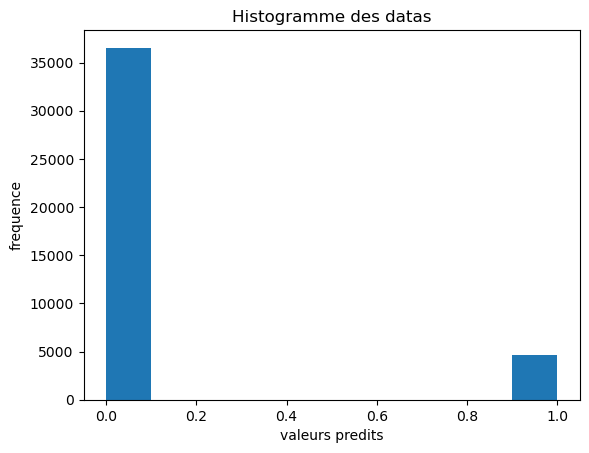

In [19]:
# creation de l'histogramme
plt.hist(Y)

# le legende
plt.title("Histogramme des datas")
plt.xlabel('valeurs predits')
plt.ylabel('frequence')
# affichage
plt.show()

In [20]:
# prepration des donnees de test etc
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
X_train

,age,marital,job,education,default,loan,housing,pdays,previous
39075,60,1,0,2,0,0,0,999,0
34855,37,2,0,6,0,0,0,999,0
7107,31,2,0,6,0,0,2,999,0
31614,30,2,1,2,1,0,0,999,0
34878,31,1,9,5,0,0,0,999,0
...,...,...,...,...,...,...,...,...,...
6265,42,1,4,3,0,0,2,999,0
11284,34,2,0,6,0,0,0,999,0
38158,30,2,7,3,0,0,2,999,0
860,27,2,9,5,0,0,0,999,0


In [22]:
X_train.shape

(28831, 9)

In [23]:
# trainning de notre model avec les données preparer
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [24]:
model.score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8871894472768471

In [26]:
X_train

,age,marital,job,education,default,loan,housing,pdays,previous
39075,60,1,0,2,0,0,0,999,0
34855,37,2,0,6,0,0,0,999,0
7107,31,2,0,6,0,0,2,999,0
31614,30,2,1,2,1,0,0,999,0
34878,31,1,9,5,0,0,0,999,0
...,...,...,...,...,...,...,...,...,...
6265,42,1,4,3,0,0,2,999,0
11284,34,2,0,6,0,0,0,999,0
38158,30,2,7,3,0,0,2,999,0
860,27,2,9,5,0,0,0,999,0


In [40]:
# fonction de test
def test_customer(modele):
    
    age = int(input("Votre age : \n"))
    marital =  int(input("marital: \n"))
    job =  int(input("job: \n"))
    education =  int(input("education 6: \n"))
    default = int(input("default: \n"))
    loan = int(input("loan: \n"))
    housing = int(input('housing: \n'))
    pdays = int(input('pdays: \n'))
    previous = int(input("previous: \n"))
    
    prediction =modele.predict([[age,marital,job,education,default,loan,housing,pdays,previous]])
    
    if prediction == 0:
        return "Mauvaise client"
    return "Bon Client"

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


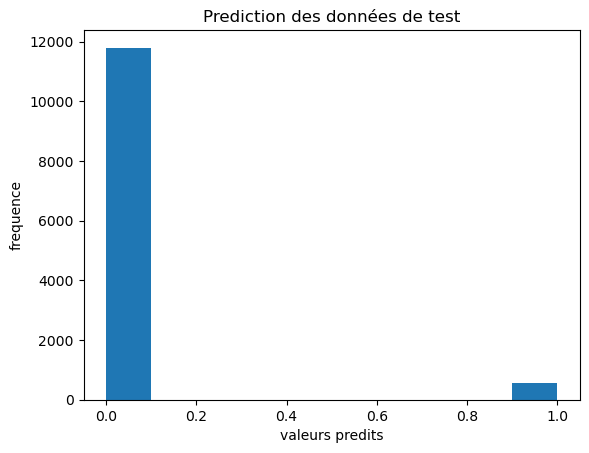

In [41]:
y_pred = model.predict(X_test)
plt.hist(y_pred)
# le legende
plt.title("Prediction des données de test")
plt.xlabel('valeurs predits')
plt.ylabel('frequence')
# affichage
plt.show()

In [ ]:
"""
    les 12k clients de la banque sont des mauvaise client et il ya peu de bon clients 
"""

In [42]:
test_customer(model)

Votre age : 
15
marital1
job4
education 63
default1
loan1
housing1
pdays0
previous1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'Mauvaise client'

In [43]:
test_customer(model)

Votre age : 
54
marital0
job0
education 60
default0
loan0
housing0
pdays0
previous0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'Bon Client'

In [44]:
#sauvegarde de mon model pour l'utiliser sur django
from joblib import dump

In [45]:
dump(model, './saveModel/superModel.joblib')

['./saveModel/superModel.joblib']